In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the datasets

In [2]:
train = pd.read_csv("fraudTrain.csv")
train

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


# **Creating a duplicate dataset**

In [3]:
train_df = pd.read_csv("fraudTrain.csv",parse_dates=['trans_date_trans_time','dob'],low_memory=False)
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Processing the datetime columns

In [4]:
import datetime

In [5]:
train_df.trans_date_trans_time.dtype

dtype('<M8[ns]')

In [6]:
train_df.sort_values(by=['trans_date_trans_time'],inplace=True,ascending=True)
train_df.trans_date_trans_time.head(20)

0    2019-01-01 00:00:18
1    2019-01-01 00:00:44
2    2019-01-01 00:00:51
3    2019-01-01 00:01:16
4    2019-01-01 00:03:06
5    2019-01-01 00:04:08
6    2019-01-01 00:04:42
7    2019-01-01 00:05:08
8    2019-01-01 00:05:18
9    2019-01-01 00:06:01
10   2019-01-01 00:06:23
11   2019-01-01 00:06:53
12   2019-01-01 00:06:56
13   2019-01-01 00:07:27
14   2019-01-01 00:09:03
15   2019-01-01 00:09:20
16   2019-01-01 00:10:49
17   2019-01-01 00:10:58
18   2019-01-01 00:11:14
19   2019-01-01 00:12:34
Name: trans_date_trans_time, dtype: datetime64[ns]

Add Date Time parameters for **trans_date_trans_time** column

In [7]:
train_df['tran_year'] = train_df.trans_date_trans_time.dt.year
train_df['tran_month'] = train_df.trans_date_trans_time.dt.month
train_df['tran_day'] = train_df.trans_date_trans_time.dt.day
train_df['tran_DayofWeek'] = train_df.trans_date_trans_time.dt.dayofweek
train_df['tran_DayofYear'] = train_df.trans_date_trans_time.dt.dayofyear
train_df['tran_hr'] = train_df.trans_date_trans_time.dt.hour
train_df['tran_min'] = train_df.trans_date_trans_time.dt.minute
train_df['tran_second'] = train_df.trans_date_trans_time.dt.second

Add Date parameters for **dob** column

In [8]:
train_df['dob_year'] = train_df.dob.dt.year
train_df['dob_month'] = train_df.dob.dt.month
train_df['dob_day'] = train_df.dob.dt.day
train_df['dob_DayofWeek'] = train_df.dob.dt.dayofweek
train_df['dob_DayofYear'] = train_df.dob.dt.dayofyear

In [9]:
train_df.drop('trans_date_trans_time',inplace=True,axis=1)
train_df.drop('dob',inplace=True,axis=1)

In [10]:
train_df.columns

Index(['Unnamed: 0', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'tran_year', 'tran_month', 'tran_day', 'tran_DayofWeek',
       'tran_DayofYear', 'tran_hr', 'tran_min', 'tran_second', 'dob_year',
       'dob_month', 'dob_day', 'dob_DayofWeek', 'dob_DayofYear'],
      dtype='object')

In [11]:
train_df

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,tran_DayofWeek,tran_DayofYear,tran_hr,tran_min,tran_second,dob_year,dob_month,dob_day,dob_DayofWeek,dob_DayofYear
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1,1,0,0,18,1988,3,9,2,69
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1,1,0,0,44,1978,6,21,2,172
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,1,1,0,0,51,1962,1,19,4,19
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1,1,0,1,16,1967,1,12,3,12
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,1,1,0,3,6,1986,3,28,4,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,6,173,12,12,8,1961,11,24,4,328
1296671,1296671,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,6,173,12,12,19,1979,12,11,1,345
1296672,1296672,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,6,173,12,12,32,1967,8,30,2,242
1296673,1296673,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,6,173,12,13,36,1980,8,18,0,231


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 34 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Unnamed: 0      1296675 non-null  int64  
 1   cc_num          1296675 non-null  int64  
 2   merchant        1296675 non-null  object 
 3   category        1296675 non-null  object 
 4   amt             1296675 non-null  float64
 5   first           1296675 non-null  object 
 6   last            1296675 non-null  object 
 7   gender          1296675 non-null  object 
 8   street          1296675 non-null  object 
 9   city            1296675 non-null  object 
 10  state           1296675 non-null  object 
 11  zip             1296675 non-null  int64  
 12  lat             1296675 non-null  float64
 13  long            1296675 non-null  float64
 14  city_pop        1296675 non-null  int64  
 15  job             1296675 non-null  object 
 16  trans_num       1296675 non-null  ob

# Checking the null values

In [13]:
train_df.isna().sum()

Unnamed: 0        0
cc_num            0
merchant          0
category          0
amt               0
first             0
last              0
gender            0
street            0
city              0
state             0
zip               0
lat               0
long              0
city_pop          0
job               0
trans_num         0
unix_time         0
merch_lat         0
merch_long        0
is_fraud          0
tran_year         0
tran_month        0
tran_day          0
tran_DayofWeek    0
tran_DayofYear    0
tran_hr           0
tran_min          0
tran_second       0
dob_year          0
dob_month         0
dob_day           0
dob_DayofWeek     0
dob_DayofYear     0
dtype: int64

# **PreProcessing the data**

In [14]:
for label, content in train_df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

merchant
category
first
last
gender
street
city
state
job
trans_num


# Checking each string column

* trans_num

In [15]:
train_df.trans_num.value_counts()

0b242abb623afc578575680df30655b9    1
c85864e7e7cf0be6d1b8597977b8afea    1
1a8a2a05638a5503cc6bb8d5735efcc1    1
4556eaf1f7def06eb500325cde4d054e    1
5e915d9f88bd09cee9655a470d9bc0bd    1
                                   ..
2d1aa5b21a993788ac19b697598ca44c    1
b50dd4b47d1ad877874661afba6eb7f6    1
5ce4e974bf15b7d9f133c6eedb81ceb1    1
64d601ddeaf4eba8b191bd1859998209    1
8f7c8e4ab7f25875d753b422917c98c9    1
Name: trans_num, Length: 1296675, dtype: int64

Dropping trans_num column since all the values are unique

In [16]:
train_df.drop('trans_num',inplace=True,axis=1)

* job

In [17]:
train_df.job.value_counts()

Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
                              ... 
Information officer              8
Veterinary surgeon               8
Ship broker                      7
Contracting civil engineer       7
Warehouse manager                7
Name: job, Length: 494, dtype: int64

In [18]:
len(train_df.job.value_counts())

494

* state

In [19]:
train_df.state.value_counts()

TX    94876
NY    83501
PA    79847
CA    56360
OH    46480
MI    46154
IL    43252
FL    42671
AL    40989
MO    38403
MN    31714
AR    31127
NC    30266
WI    29368
VA    29250
SC    29190
KY    28475
IN    27580
IA    26985
OK    26671
MD    26193
GA    26063
WV    25691
NJ    24603
NE    24168
KS    22996
MS    21188
LA    20965
WY    19322
WA    18924
OR    18597
TN    17554
ME    16505
NM    16407
ND    14786
CO    13880
MA    12376
SD    12324
VT    11768
MT    11754
AZ    10770
UT    10699
NH     8278
CT     7702
NV     5607
ID     5545
DC     3613
HI     2559
AK     2120
RI      550
DE        9
Name: state, dtype: int64

In [20]:
len(train_df.state.value_counts())

51

* city

In [21]:
train_df.city.value_counts()

Birmingham     5617
San Antonio    5130
Utica          5105
Phoenix        5075
Meridian       5060
               ... 
Vacaville         7
Claypool          7
Karns City        7
Bruce             7
Chattanooga       7
Name: city, Length: 894, dtype: int64

In [22]:
len(train_df.city.value_counts())

894

* street

In [23]:
train_df.street.value_counts()

0069 Robin Brooks Apt. 695           3123
864 Reynolds Plains                  3123
8172 Robertson Parkways Suite 072    3119
4664 Sanchez Common Suite 930        3117
8030 Beck Motorway                   3113
                                     ... 
7281 Joshua Mills Apt. 077              7
3307 Ferguson Way                       7
9599 Washington Field Suite 238         7
3437 Ross Flat Apt. 592                 7
27954 Hall Mill Suite 575               7
Name: street, Length: 983, dtype: int64

In [24]:
len(train_df.street.value_counts())

983

* gender

In [25]:
train_df.gender.value_counts()

F    709863
M    586812
Name: gender, dtype: int64

In [26]:
len(train_df.gender.value_counts())

2

* last

In [27]:
train_df.last

<bound method NDFrame.last of          Unnamed: 0               cc_num                             merchant  \
0                 0     2703186189652095           fraud_Rippin, Kub and Mann   
1                 1         630423337322      fraud_Heller, Gutmann and Zieme   
2                 2       38859492057661                 fraud_Lind-Buckridge   
3                 3     3534093764340240   fraud_Kutch, Hermiston and Farrell   
4                 4      375534208663984                  fraud_Keeling-Crist   
...             ...                  ...                                  ...   
1296670     1296670       30263540414123                    fraud_Reichel Inc   
1296671     1296671     6011149206456997             fraud_Abernathy and Sons   
1296672     1296672     3514865930894695                 fraud_Stiedemann Ltd   
1296673     1296673     2720012583106919  fraud_Reinger, Weissnat and Strosin   
1296674     1296674  4292902571056973207  fraud_Langosh, Wintheiser and Hyatt  

Dropping last column

In [28]:
train_df.drop('last',inplace=True,axis=1)

* first

In [29]:
train_df.first

<bound method NDFrame.first of          Unnamed: 0               cc_num                             merchant  \
0                 0     2703186189652095           fraud_Rippin, Kub and Mann   
1                 1         630423337322      fraud_Heller, Gutmann and Zieme   
2                 2       38859492057661                 fraud_Lind-Buckridge   
3                 3     3534093764340240   fraud_Kutch, Hermiston and Farrell   
4                 4      375534208663984                  fraud_Keeling-Crist   
...             ...                  ...                                  ...   
1296670     1296670       30263540414123                    fraud_Reichel Inc   
1296671     1296671     6011149206456997             fraud_Abernathy and Sons   
1296672     1296672     3514865930894695                 fraud_Stiedemann Ltd   
1296673     1296673     2720012583106919  fraud_Reinger, Weissnat and Strosin   
1296674     1296674  4292902571056973207  fraud_Langosh, Wintheiser and Hyatt 

Dropping first column

In [30]:
train_df.drop('first',inplace=True,axis=1)

* category

In [31]:
train_df.category.value_counts()

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64

In [32]:
len(train_df.category.value_counts())

14

* merchant

In [33]:
train_df.merchant.value_counts()

fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Douglas, DuBuque and McKenzie      775
fraud_Treutel-King                       775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: merchant, Length: 693, dtype: int64

In [34]:
len(train_df.merchant.value_counts())

693

Checking the data-1

In [35]:
for label,content in train_df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

merchant
category
gender
street
city
state
job


# **Changing the string columns into numerical**

In [36]:
for label,content in train_df.items():
    if pd.api.types.is_string_dtype(content):
        train_df[label] = content.astype('category').cat.as_ordered()

Check if there are any string columns remaining

In [37]:
for label,content in train_df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 31 columns):
 #   Column          Non-Null Count    Dtype   
---  ------          --------------    -----   
 0   Unnamed: 0      1296675 non-null  int64   
 1   cc_num          1296675 non-null  int64   
 2   merchant        1296675 non-null  category
 3   category        1296675 non-null  category
 4   amt             1296675 non-null  float64 
 5   gender          1296675 non-null  category
 6   street          1296675 non-null  category
 7   city            1296675 non-null  category
 8   state           1296675 non-null  category
 9   zip             1296675 non-null  int64   
 10  lat             1296675 non-null  float64 
 11  long            1296675 non-null  float64 
 12  city_pop        1296675 non-null  int64   
 13  job             1296675 non-null  category
 14  unix_time       1296675 non-null  int64   
 15  merch_lat       1296675 non-null  float64 
 16  merch_long      12

Filling all categorical columns into numerical

In [39]:
for label, content in train_df.items():
    if not pd.api.types.is_string_dtype(content):
                train_df[label] = pd.Categorical(content).codes + 1

# **Data Visualization**

In [40]:
train_df.corr()

,Unnamed: 0,cc_num,merchant,category,amt,gender,street,city,state,zip,...,tran_DayofWeek,tran_DayofYear,tran_hr,tran_min,tran_second,dob_year,dob_month,dob_day,dob_DayofWeek,dob_DayofYear
Unnamed: 0,1.000000e+00,0.002470,-0.000972,0.000250,-0.000209,-0.000945,-0.001067,-0.000423,0.001048,0.000781,...,-0.030910,0.185243,0.001073,2.988867e-05,0.000174,0.003715,-0.000967,0.001210,0.000401,-8.528464e-04
cc_num,2.469632e-03,1.000000,-0.000505,0.005655,0.005118,-0.040431,0.004060,0.001002,-0.011932,0.013445,...,-0.001211,0.000933,0.011363,9.276132e-04,-0.000242,0.031077,0.071677,-0.036637,-0.020696,6.763024e-02
merchant,-9.718206e-04,-0.000505,1.000000,0.032302,-0.007006,-0.000915,0.000718,-0.000294,-0.000424,0.001122,...,0.000482,0.000364,-0.002013,2.438665e-04,-0.000146,0.006628,-0.000248,0.000227,-0.000492,-2.363908e-04
category,2.495622e-04,0.005655,0.032302,1.000000,-0.048237,-0.028259,0.002258,0.000784,0.000211,0.002099,...,-0.001104,0.000706,0.158323,1.625744e-03,-0.000145,0.003887,0.002582,0.000315,-0.001610,2.583330e-03
amt,-2.085214e-04,0.005118,-0.007006,-0.048237,1.000000,-0.000054,0.003792,0.000415,0.001836,0.004649,...,-0.000731,-0.003631,-0.084229,1.209413e-04,0.002229,0.020472,0.000012,0.004201,-0.002223,3.964138e-04
gender,-9.450357e-04,-0.040431,-0.000915,-0.028259,-0.000054,1.000000,0.042679,0.016039,-0.031794,-0.064342,...,-0.000914,-0.000232,-0.037835,-1.239268e-03,-0.000365,-0.005108,-0.067862,-0.020647,-0.014310,-6.968744e-02
street,-1.066586e-03,0.004060,0.000718,0.002258,0.003792,0.042679,1.000000,-0.024811,0.014045,-0.052836,...,-0.002565,0.000344,-0.009915,-1.172298e-03,-0.001003,-0.037839,0.038721,-0.051079,0.024942,3.468608e-02
city,-4.230686e-04,0.001002,-0.000294,0.000784,0.000415,0.016039,-0.024811,1.000000,-0.043064,0.076073,...,-0.001069,-0.000342,0.006939,6.538160e-04,-0.000414,0.017796,-0.046071,0.028483,-0.072076,-4.369784e-02
state,1.047520e-03,-0.011932,-0.000424,0.000211,0.001836,-0.031794,0.014045,-0.043064,1.000000,-0.111281,...,0.000874,0.000225,0.006881,-2.865396e-04,-0.000315,0.051798,0.076770,0.029524,0.015640,7.866607e-02
zip,7.811652e-04,0.013445,0.001122,0.002099,0.004649,-0.064342,-0.052836,0.076073,-0.111281,1.000000,...,-0.001274,0.000758,0.006492,8.481889e-04,0.000089,-0.007352,0.016596,0.057953,-0.055759,2.222737e-02


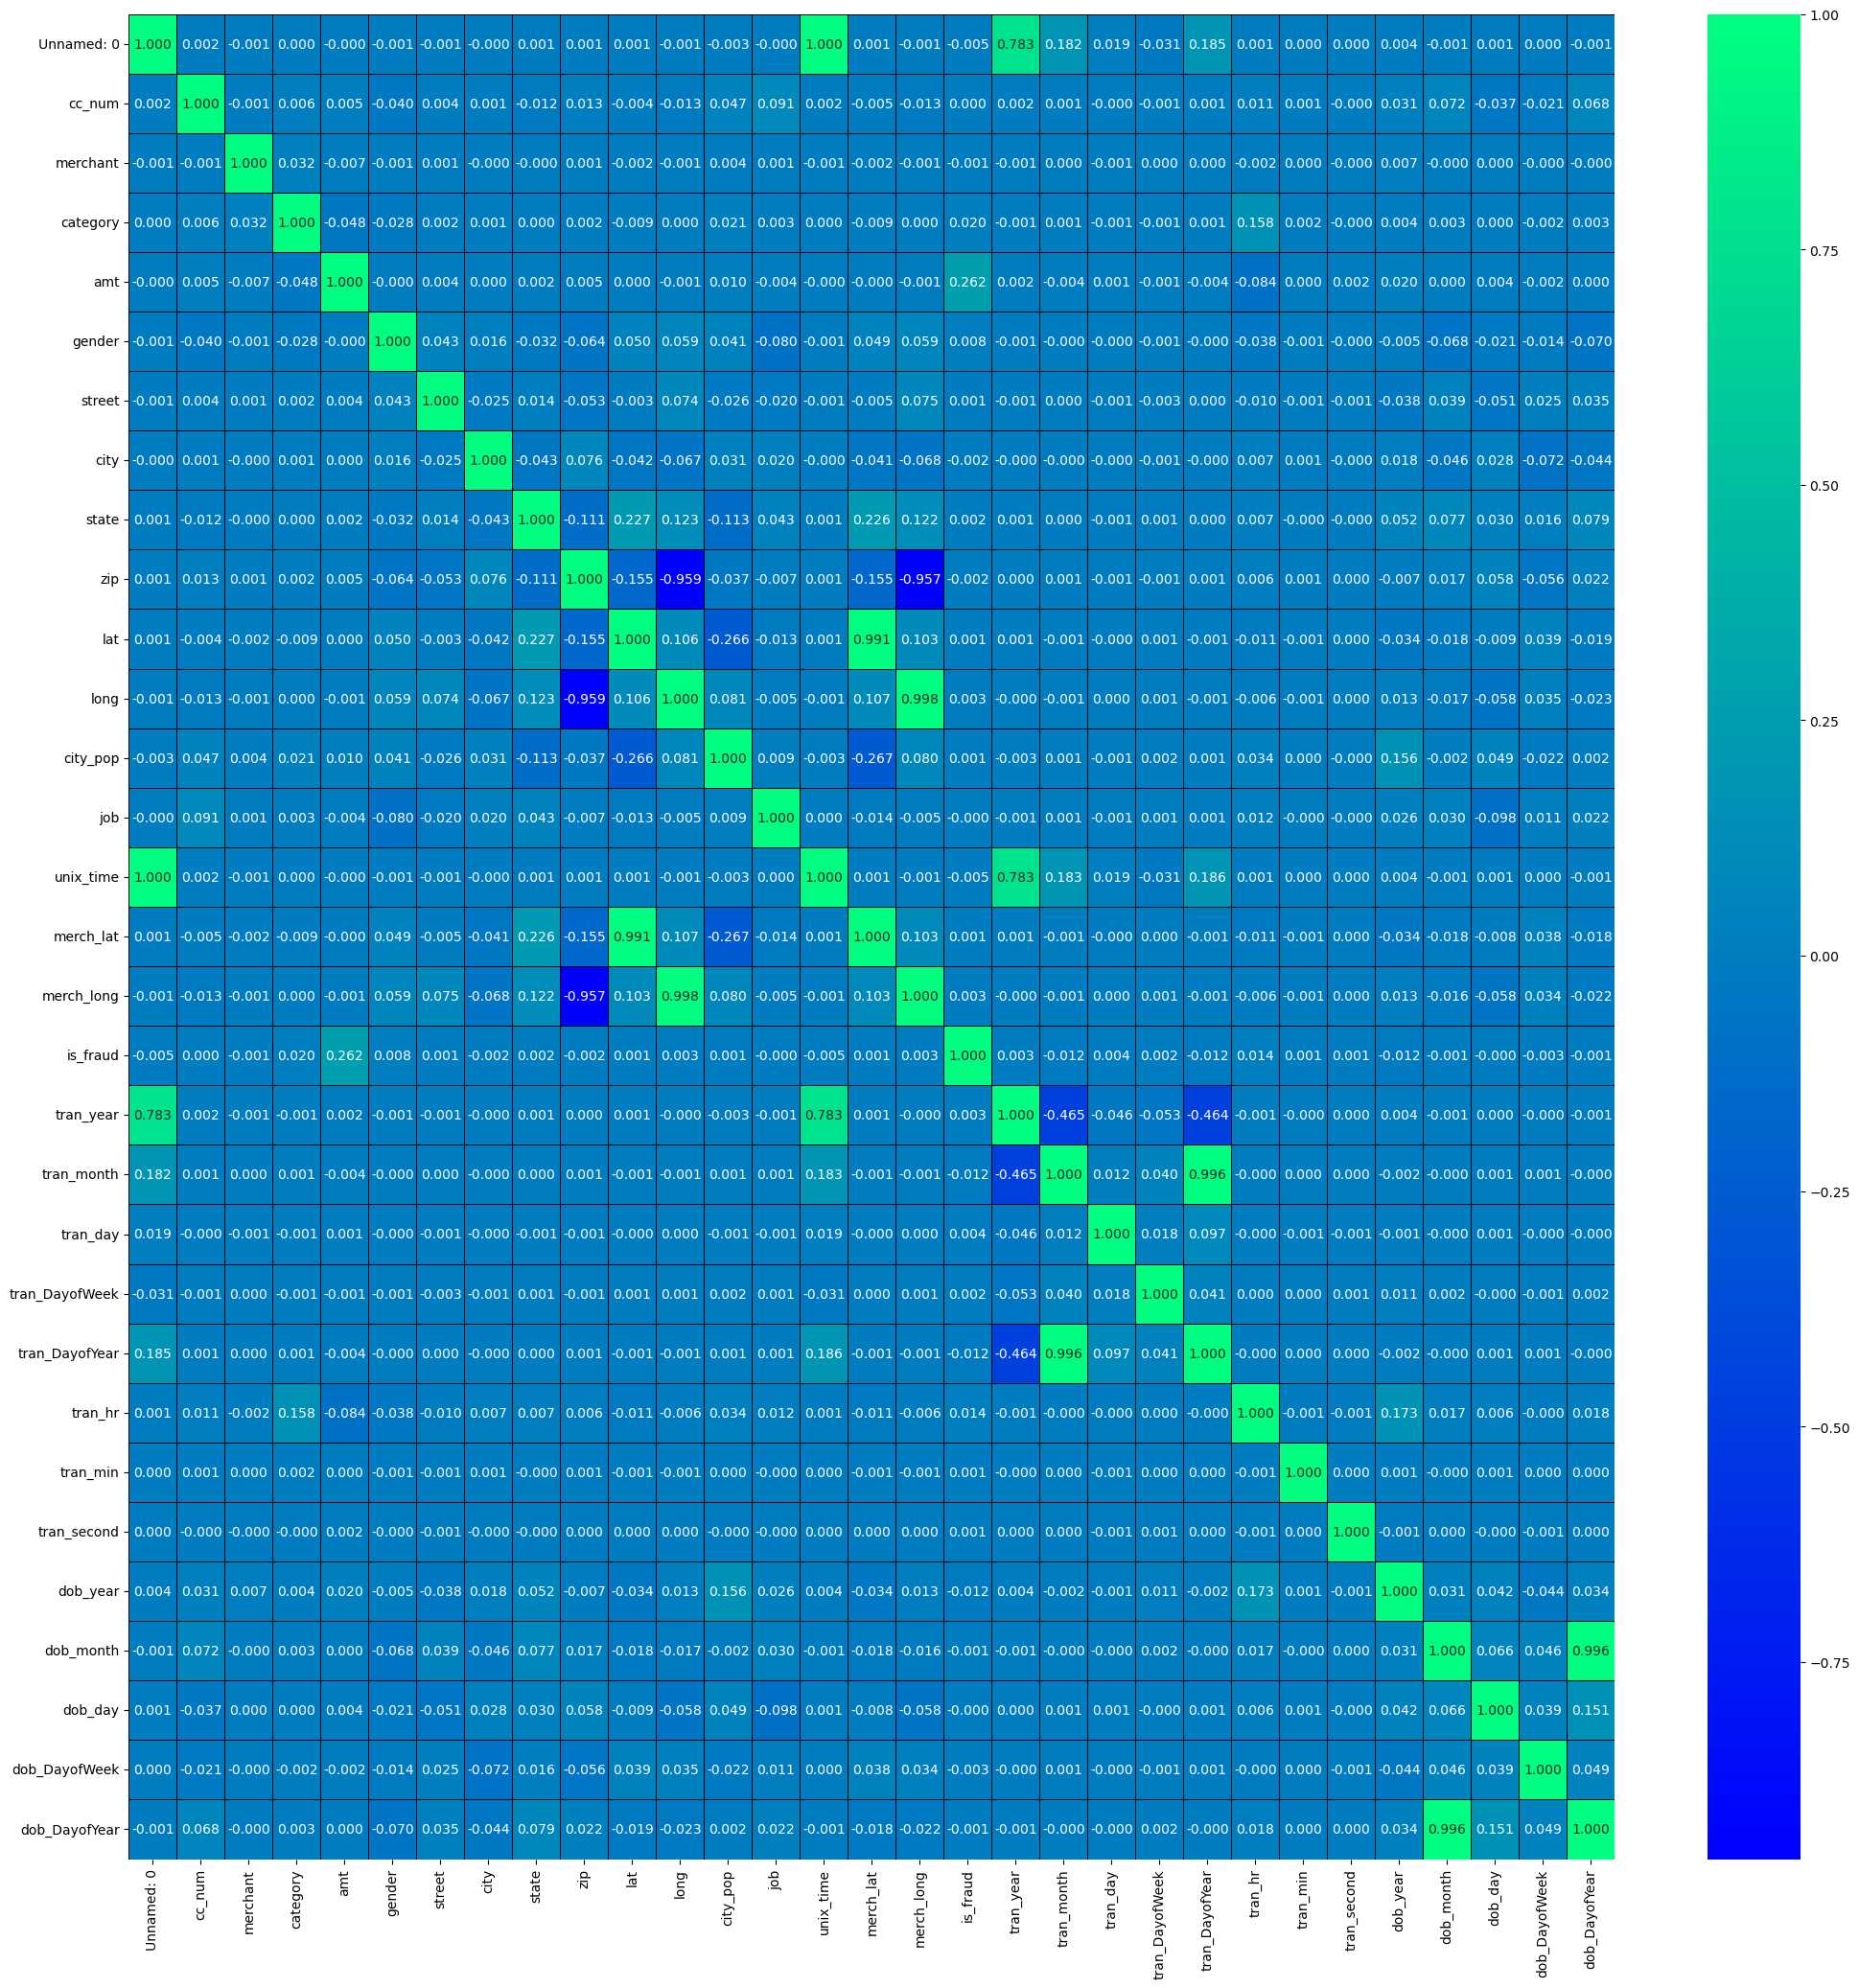

In [41]:
plt.figure(figsize=(25,25))
sns.heatmap(train_df.corr(),annot=True,cmap='winter',fmt='.3f',linewidths=0.5,linecolor='black');

# Removing Highly Correalted features

In [42]:
train_df.drop(['Unnamed: 0','merch_long','merch_lat','tran_DayofYear','dob_DayofYear'],axis=1,inplace=True)

In [43]:
train_df.drop('unix_time',axis=1,inplace=True)

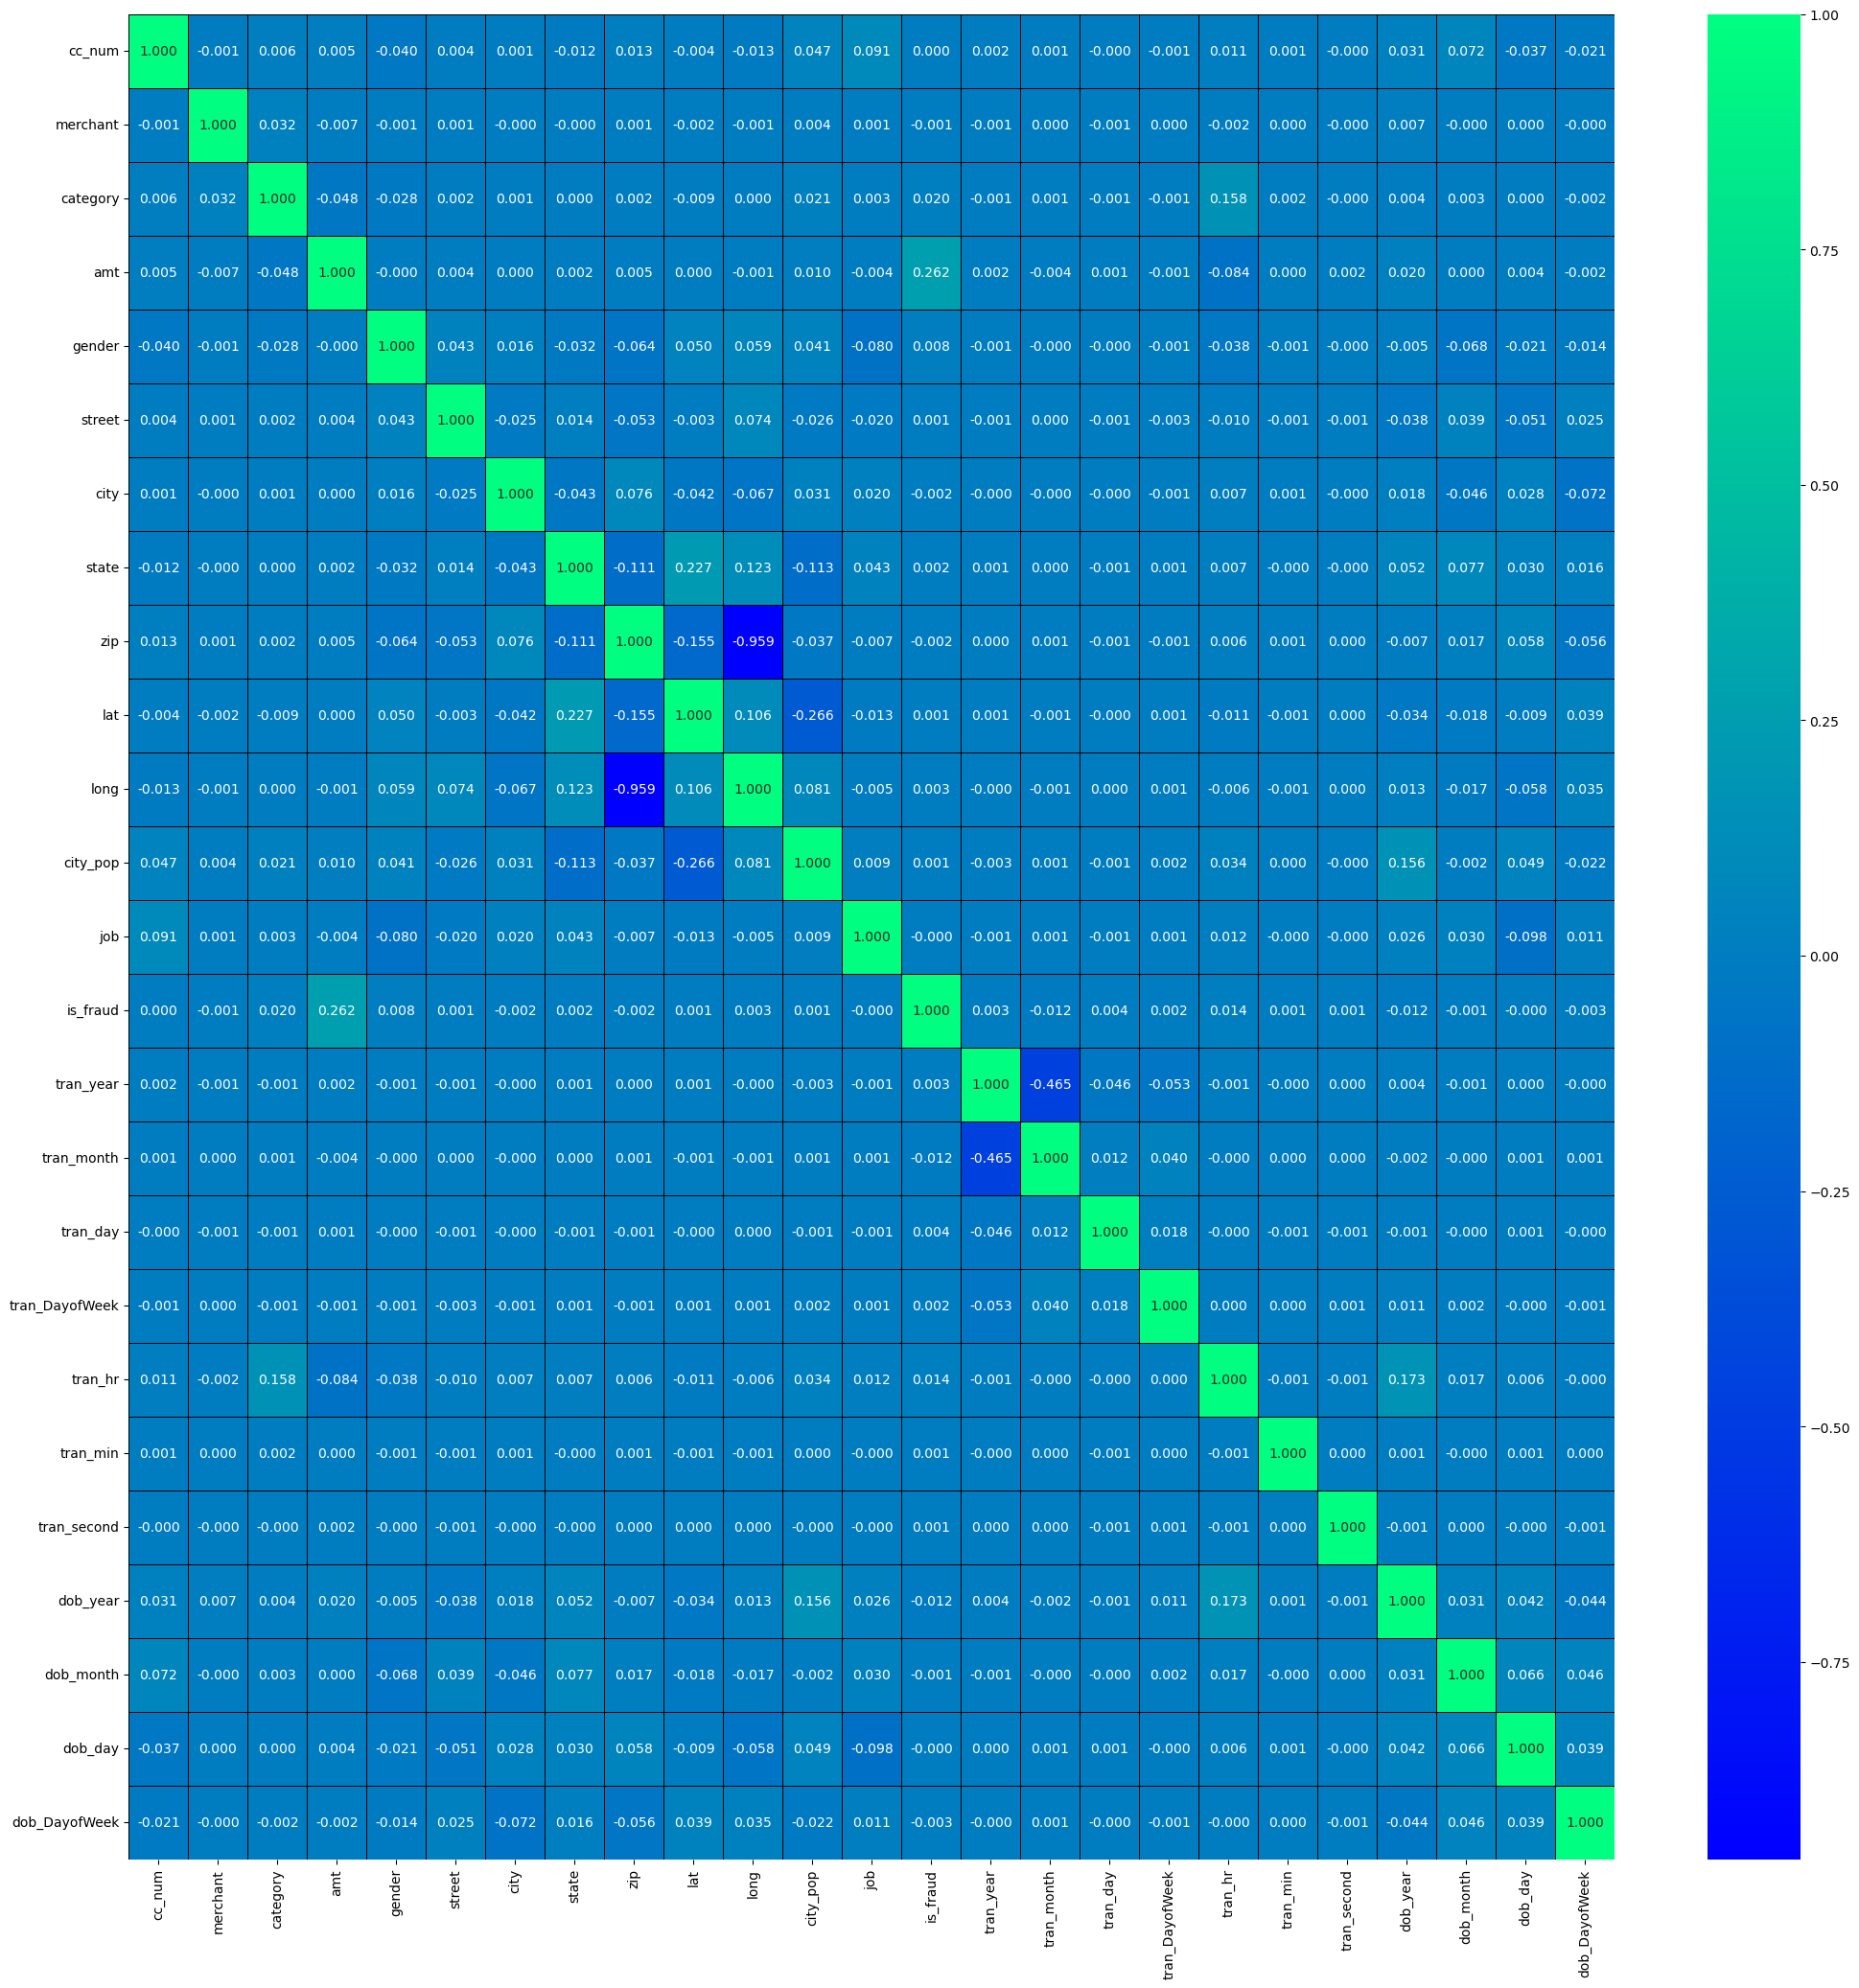

In [44]:
plt.figure(figsize=(25,25))
sns.heatmap(train_df.corr(),annot=True,cmap='winter',fmt='.3f',linewidths=0.5,linecolor='black');

In [45]:
train_df.drop(['long','city_pop','tran_month'],axis=1,inplace=True)

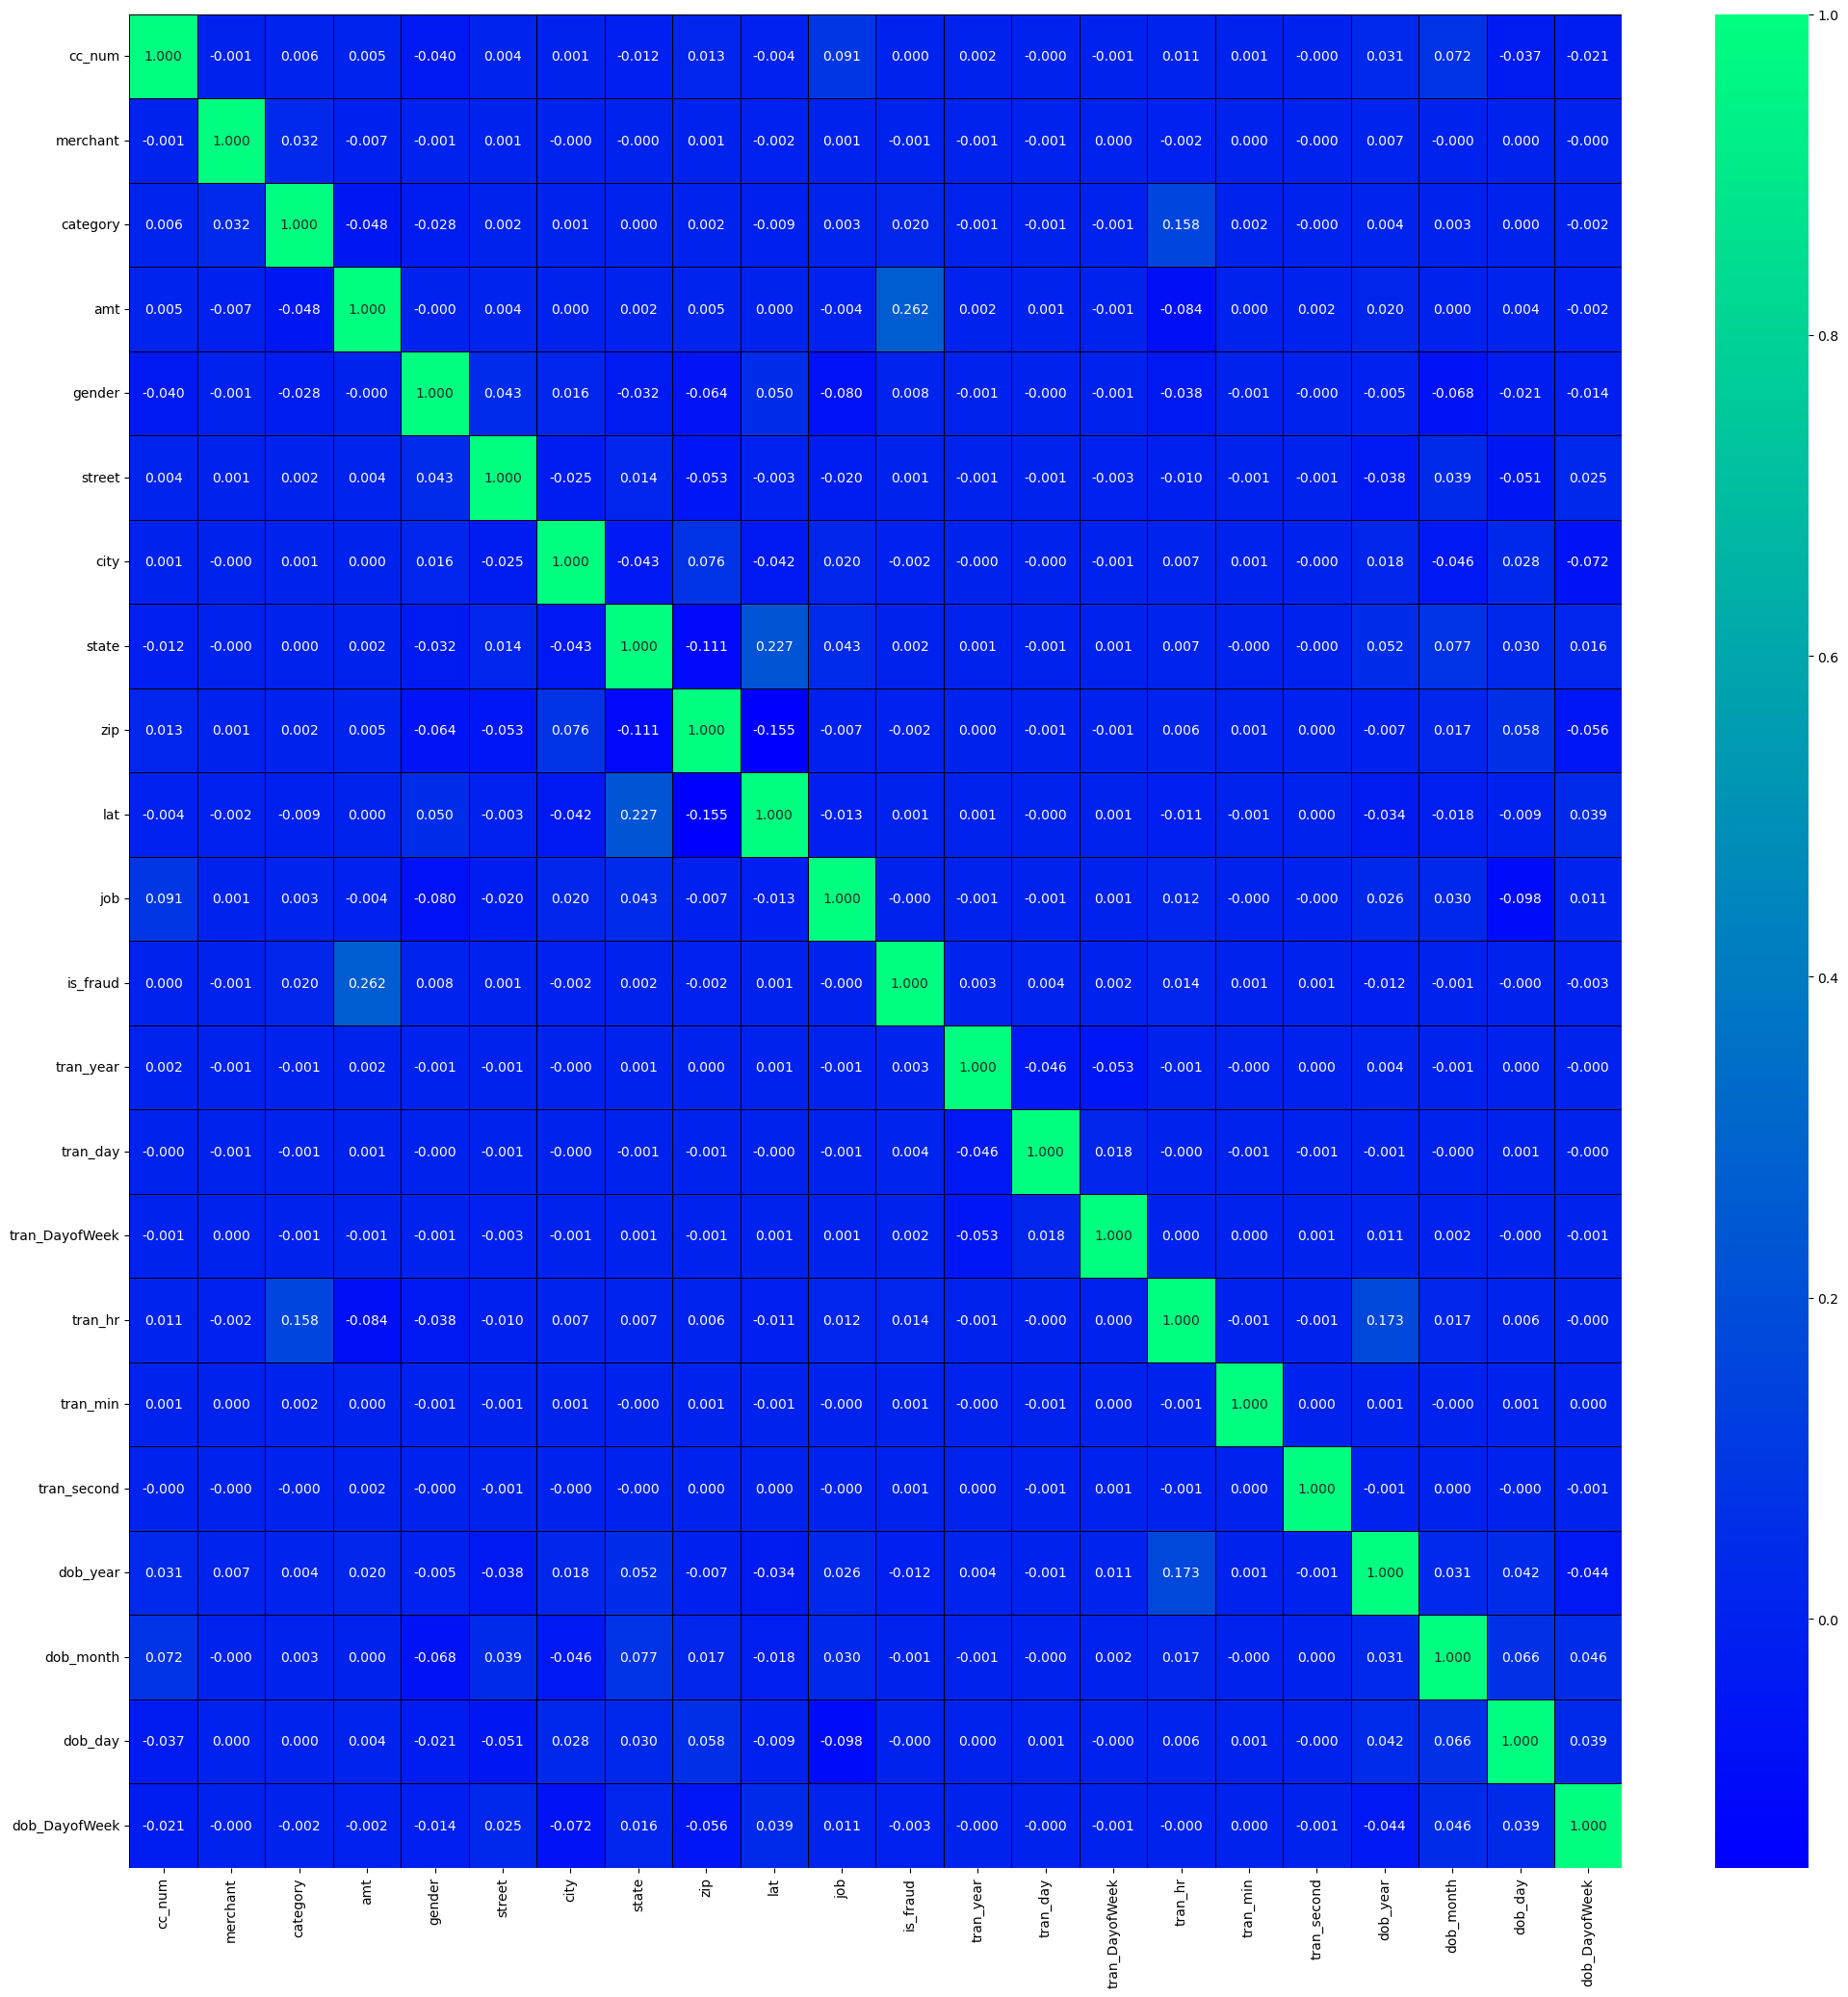

In [46]:
plt.figure(figsize=(25,25))
sns.heatmap(train_df.corr(),annot=True,cmap='winter',fmt='.3f',linewidths=0.5,linecolor='black');

# Checking the balance of the dataset

In [47]:
train_df.is_fraud.value_counts()

1    1289169
2       7506
Name: is_fraud, dtype: int64

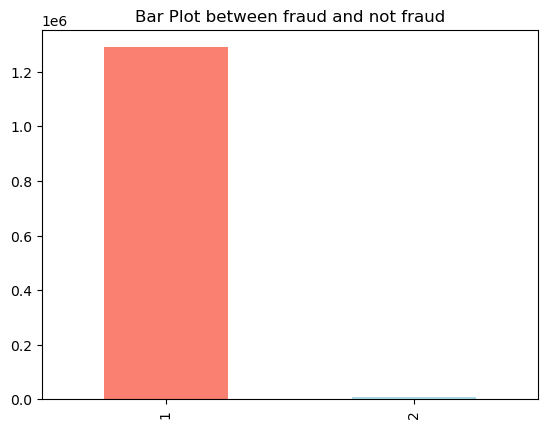

In [48]:
train_df.is_fraud.value_counts().plot(kind='bar',color=['salmon','lightblue'],title='Bar Plot between fraud and not fraud');

Not Fraud -> 1
Fraud -> 2

The Data is imbalanced. Balancing the Data

In [49]:
# class count
class_count_1, class_count_2 = train_df['is_fraud'].value_counts()

class_1 = train_df[train_df['is_fraud']==1]
class_2 = train_df[train_df['is_fraud']==2]
print("Class 1: ",class_1.shape)
print("Class 2: ",class_2.shape)

Class 1:  (1289169, 22)
Class 2:  (7506, 22)


Random UnderSampling

Total class of 1 and 2:  1    7506
2    7506
Name: is_fraud, dtype: int64


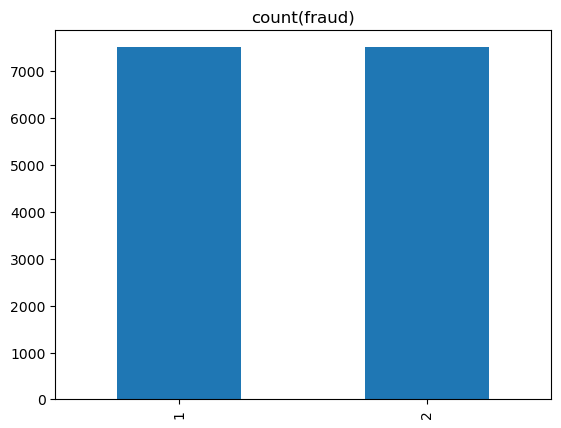

In [50]:
class_1_under = class_1.sample(class_count_2)
test_under = pd.concat([class_1_under,class_2],axis=0)
print("Total class of 1 and 2: ",test_under['is_fraud'].value_counts())
test_under['is_fraud'].value_counts().plot(kind='bar',title='count(fraud)');

# **The data is ready for modelling**

Importing Required Models from sklearn

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

Splitting the Data into independent and dependent variables

In [53]:
X = test_under.drop('is_fraud',axis=1)
y = test_under.is_fraud

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [63]:
# Put Models in a dictionary
models = {'Logistic Regression':LogisticRegression(),
          'KNN':KNeighborsClassifier(),
          'Random Forest':RandomForestClassifier(),
          'Decision Tree Classifier':DecisionTreeClassifier()}

# Create a function to fit and score models
def fit_and_score(models,X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine models.
    models: a dict of different Scikit-Learn machine learning models
    '''

    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)*100
    
    return model_scores


In [64]:
model_score = fit_and_score(models,X_train,X_test,y_train,y_test);
model_score

c:\Users\Dell\ML-course\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 84.94838494838494,
 'KNN': 88.44488844488845,
 'Random Forest': 96.57009657009658,
 'Decision Tree Classifier': 96.47019647019647}

<Axes: >

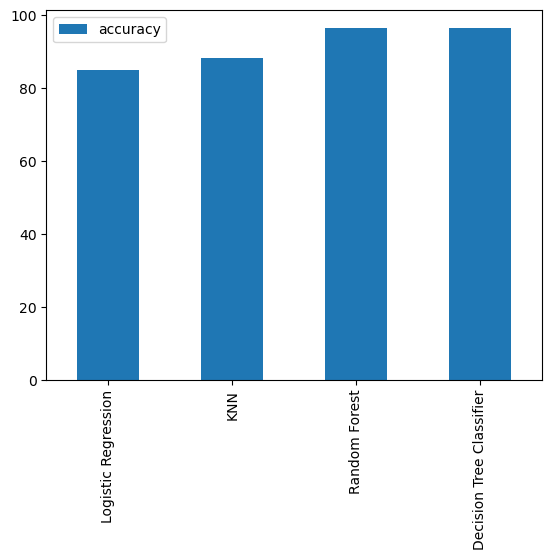

In [65]:
model_comparison = pd.DataFrame(model_score,index=['accuracy'])
model_comparison.T.plot.bar()

Since Random Forest has the highest accuracy we will continue with RandomForestClassifier

Hypertuning the parameters

In [68]:

grid = {'n_estimators':[400,600,800],'max_depth':[None,1,2,4],
        "max_features":['sqrt','log2'],
        "min_samples_split":[6],
        "min_samples_leaf":[1,2]}

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Instantisate the RandomForestClassifier
clf = RandomForestClassifier(n_jobs=-1)

#Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid,
                            cv=5,
                            verbose=2)

#fit the randomisedSearchCv version of clf
gs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   2.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   2.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   2.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   2.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   2.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=600; total time=   4.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=600; total time=   4.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6,

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [None, 1, 2, 4],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [400, 600, 800]},
             verbose=2)

In [70]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 800}

In [71]:
gs_clf.score(X_test,y_test)*100

96.30369630369631

**Creating the final model with the hyper tuned parameters**

In [74]:
final_model = RandomForestClassifier(n_estimators = 800,min_samples_split=6,max_features='sqrt',min_samples_leaf=1,random_state=42)
final_model.fit(X_train,y_train)
y_preds = final_model.predict(X_test)
print(accuracy_score(y_test,y_preds))

0.9627039627039627


# **Predicting the Test Data**

Importing the test dataset

In [78]:
test_df = pd.read_csv("fraudTest.csv",low_memory=False,parse_dates=['trans_date_trans_time','dob'])
test_df.shape

(555719, 23)

PreProcessing the test dataset

In [80]:
test_df.sort_values(by=['trans_date_trans_time'],inplace=True,ascending=True)

In [81]:
test_df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [82]:
test_df['tran_year'] = test_df.trans_date_trans_time.dt.year
test_df['tran_month'] = test_df.trans_date_trans_time.dt.month
test_df['tran_day'] = test_df.trans_date_trans_time.dt.day
test_df['tran_DayofWeek'] = test_df.trans_date_trans_time.dt.dayofweek
test_df['tran_DayofYear'] = test_df.trans_date_trans_time.dt.dayofyear
test_df['tran_hr'] = test_df.trans_date_trans_time.dt.hour
test_df['tran_min'] = test_df.trans_date_trans_time.dt.minute
test_df['tran_second'] = test_df.trans_date_trans_time.dt.second

test_df['dob_year'] = test_df.dob.dt.year
test_df['dob_month'] = test_df.dob.dt.month
test_df['dob_day'] = test_df.dob.dt.day
test_df['dob_DayofWeek'] = test_df.dob.dt.dayofweek
test_df['dob_DayofYear'] = test_df.dob.dt.dayofyear

test_df.drop('trans_date_trans_time',inplace=True,axis=1)
test_df.drop('dob',inplace=True,axis=1)

test_df.drop('trans_num',inplace=True,axis=1)
test_df.drop('last',inplace=True,axis=1)
test_df.drop('first',inplace=True,axis=1)

for label,content in test_df.items():
    if pd.api.types.is_string_dtype(content):
        test_df[label] = content.astype('category').cat.as_ordered()

test_df.drop(['Unnamed: 0','merch_long','merch_lat','tran_DayofYear','dob_DayofYear'],axis=1,inplace=True)
test_df.drop('unix_time',axis=1,inplace=True)
test_df.drop(['long','city_pop','tran_month'],axis=1,inplace=True)

In [85]:
for label, content in test_df.items():
    if not pd.api.types.is_string_dtype(content):
                test_df[label] = pd.Categorical(content).codes + 1

In [86]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   cc_num          555719 non-null  int16
 1   merchant        555719 non-null  int16
 2   category        555719 non-null  int8 
 3   amt             555719 non-null  int32
 4   gender          555719 non-null  int8 
 5   street          555719 non-null  int16
 6   city            555719 non-null  int16
 7   state           555719 non-null  int8 
 8   zip             555719 non-null  int16
 9   lat             555719 non-null  int16
 10  job             555719 non-null  int16
 11  is_fraud        555719 non-null  int8 
 12  tran_year       555719 non-null  int8 
 13  tran_day        555719 non-null  int8 
 14  tran_DayofWeek  555719 non-null  int8 
 15  tran_hr         555719 non-null  int8 
 16  tran_min        555719 non-null  int8 
 17  tran_second     555719 non-null  int8 
 18  dob_

In [87]:
test_X = test_df.drop('is_fraud',axis=1)
test_y = test_df.is_fraud

Predicting the test data 

In [88]:
test_preds = final_model.predict(test_X)
test_preds

array([1, 1, 1, ..., 1, 2, 1], dtype=int8)

Getting the accuracy of the predictions

In [90]:
print(accuracy_score(test_y,test_preds)*100)

97.5145712131491


# Dumping the model to a joblib

In [91]:
import joblib
joblib.dump(final_model,"credit_card_fraud.joblib")

['credit_card_fraud.joblib']